## Linear Regression

The statistical method linear regression is used to model the relationship between dependent and independent variables by fitting a linear equation to the observed data. We will be using linear regression to understand and predict the behavior of our Price, X, variable, based on our explanatory, y, variables. 

In [18]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('../data/data_feature_engineering.csv')
df.head()

,price,name,distance,source,destination,precipIntensity,humidity,temperatureHigh,apparentTemperatureHigh,uvIndex,precipIntensityMax,temperatureMax,apparentTemperatureMax
0,12.0,4,1.11,6,11,0.0000,0.60,42.52,40.53,0,0.0003,42.52,40.53
1,16.0,0,1.11,6,11,0.0000,0.66,33.83,32.85,0,0.0001,33.83,32.85
2,7.5,3,1.11,6,11,0.0000,0.56,33.83,32.85,0,0.0001,33.83,32.85
3,7.5,5,1.11,6,11,0.0567,0.86,43.83,38.38,0,0.1252,43.83,38.38
4,26.0,1,1.11,6,11,0.0000,0.64,33.83,32.85,0,0.0001,33.83,32.85


In [20]:
X = df[['distance', 'precipIntensity', 'humidity', 'temperatureHigh', 'apparentTemperatureHigh', 'uvIndex', 'precipIntensityMax', 'temperatureMax', 'apparentTemperatureMax']]
y = df['price']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(264454, 9) (66114, 9) (264454,) (66114,)


In [22]:
# Fit a linear regression model using the train and test split
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [23]:
# Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# R-squared (R2)
r2 = r2_score(y_test, predictions)
print("R-squared:", r2)

# Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)


Mean Squared Error (MSE): 64.71092631020684
R-squared (R2): 0.10602786702109324
Root Mean Squared Error (RMSE): 8.044310182371564


The model has yielded an MSE of 64.71, the R2 value of 0.106, and a RMSE of about 8.04. The metrics show us that the average squared difference between the actual and predicted values of the price, is approximately 64.71, the model only explains around 10.6% of the variability and the average predicted error is 8.04. While the model demonstrates adequate predictive capability, the relatively high MSE and RMSE values and the low R-squared suggest limited explanatory power. Therefore, this linear regression model may not be the most suitable choice for accurately predicting prices in this context.

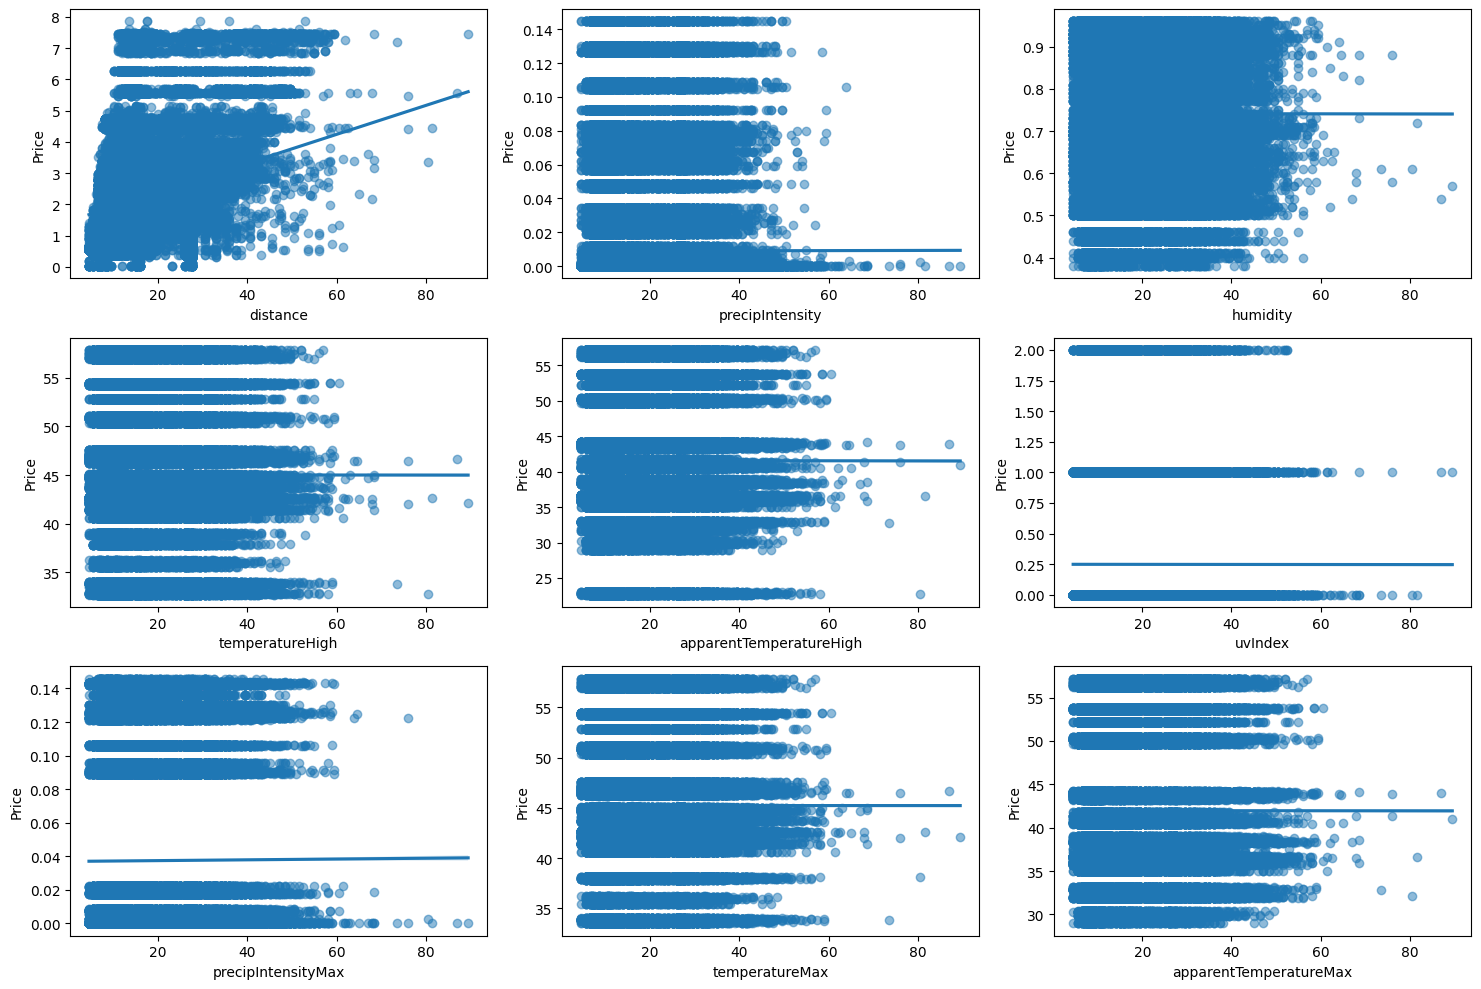

In [25]:

# Plotting regression line for each exploratory variable
exploratory_vars = ['distance', 'precipIntensity', 'humidity', 'temperatureHigh', 
                    'apparentTemperatureHigh', 'uvIndex', 'precipIntensityMax', 
                    'temperatureMax', 'apparentTemperatureMax']

plt.figure(figsize=(15, 10))

for i, var in enumerate(exploratory_vars):
    plt.subplot(3, 3, i+1)
    sns.regplot(y=df[var], x=df['price'], scatter_kws={'alpha':0.5})
    plt.xlabel('Price')
    plt.ylabel(var)

plt.tight_layout()
plt.show()


### Drawbacks
The main drawbacks of the linear regression model lie in the assumption of linearity between the independent and dependent variables and the the sensitivity to outliers, which influences disproportion in the model and it's coefficients. Both of which lead to suboptimal predictions.